In [1]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sqlite3
DB_FILE = 'dataset/stock.db'
cnx = sqlite3.connect(DB_FILE)
df_uplist = pd.read_sql("SELECT update_id AS update_seq, date_from, date_to, date_published FROM dataset_set100", cnx)
df_uplist

,update_seq,date_from,date_to,date_published
0,Update_1,2014-01-01,2014-06-30,2013-12-16
1,Update_2,2014-07-01,2014-12-31,2014-06-16
2,Update_3,2015-01-01,2015-06-30,2014-12-15
3,Update_4,2015-01-01,2015-06-30,2015-04-29
4,Update_5,2015-07-01,2015-12-31,2015-06-16
5,Update_6,2016-01-01,2016-06-30,2015-12-14
6,Update_7,2016-01-01,2016-06-30,2015-12-30
7,Update_8,2016-07-01,2016-12-31,2016-06-17
8,Update_9,2016-07-01,2016-12-31,2016-12-01
9,Update_10,2017-01-01,2017-06-30,2016-12-16


In [5]:
up = {}
for i in range(2,18):
    df_up = pd.read_sql("SELECT constituents FROM dataset_set100 WHERE update_id='Update_%s'" % i, cnx)
    stocks = set(df_up[0:1].values[0][0].replace(" ",",").split(','))
    up[i] = stocks
# pd.DataFrame(up)

In [7]:
# How many period does GL belong in SET100?

# companies['WHAUP']

for i in up:
    if 'WHAUP' in up[i]:
        print(i)
        print(" ".join(up[i]))
        
# companies['GL']

for i in up:
    if 'GL' in up[i]:
        print(i)
        print(" ".join(up[i]))

12
DTAC MAJOR CHG LPN ESSO ORI JMART PTTGC KTB TPIPP CPF CBG BCPG COM7 WHA BEAUTY STEC TASCO TTA ROBINS CK TOP TKN BJC BANPU GUNKUL TISCO TU TVO PSH TPIPL BTS MINT HANA SCC PTG AOT GPSC EGCO WHAUP GGC SIRI BEM BBL UNIQ EPG SUPER MONO PSL KTC MEGA AAV KKP KBANK CKP LH BEC INTUCH TRUE MTLS HMPRO BCP BLAND CENTEL BPP KCE AP AMATA SGP GFPT BA PTTEP BCH ANAN SPRC GLOBAL THAI JWD EA CPALL SCB UV CPN BDMS BIG SAWAD MC THCOM BH IRPC WORK TCAP IVL QH PTT ITD ADVANC STA TMB SPALI
13
DTAC MAJOR CHG LPN ESSO ORI PRM PTTGC KTB TPIPP GLOW DELTA CPF CBG BCPG BLA COM7 WHA BEAUTY STEC TASCO ROBINS CK TOP TKN BJC BANPU GUNKUL TISCO TU TVO PSH TPIPL BTS MINT HANA SCC PTG TOA AOT GPSC EGCO WHAUP GGC SIRI BEM BBL EPG SUPER PSL KTC MEGA AAV KKP KBANK CKP LH INTUCH TRUE MTLS HMPRO BCP BLAND CENTEL BPP KCE AP AMATA SGP GFPT PTTEP BCH SPRC GLOBAL THAI TTW EA CPALL SCB UV CPN BDMS RS THANI SAWAD BH IRPC WORK TCAP IVL ERW QH RATCH PTT ITD ADVANC STA TMB BGRIM SPALI
14
DTAC MAJOR CHG ESSO ORI AEONTS PRM PTTGC KTB

In [9]:
# What are the inclusion and exclusion for each update.

idx = []
for k, v in up.items():
    id = 'Update_%s' % k
    try:
        exclusion = up[k-1].difference(up[k])
        inclusion = up[k].difference(up[k-1])
        print(id, exclusion, inclusion)
        idx.append({'update_seq': id,
                    'set100': ",".join(sorted(list(v))),
                    'inclusion': ",".join(sorted(list(inclusion))),
                    'exclusion': ",".join(sorted(list(exclusion)))
                   })
    except:
        pass

Update_3 {'NYT', 'BLA', 'MCOT', 'SRICHA', 'DCC', 'ESSO', 'THRE', 'WHA', 'RS', 'TASCO'} {'PTG', 'SIM', 'SF', 'SGP', 'ICHI', 'HANA', 'ANAN', 'SAWAD', 'DEMCO', 'KTIS'}
Update_4 {'HEMRAJ'} {'IFEC'}
Update_5 {'PTG', 'NOK', 'SIM', 'SCCC', 'IFEC', 'THREL', 'BAY', 'STA', 'BJC', 'BIGC', 'KTIS', 'BCH', 'MEGA'} {'S', 'RS', 'U', 'UNIQ', 'SAPPE', 'LHBANK', 'CBG', 'CKP', 'BA', 'ASP', 'WHA', 'BEAUTY', 'MONO'}
Update_6 {'ERW', 'MC', 'GLOBAL', 'U', 'LOXLEY', 'SF', 'TUF', 'SAPPE', 'SGP', 'GFPT', 'ASP', 'RATCH', 'MONO', 'DEMCO', 'PSL'} {'TU', 'PTG', 'SCN', 'BLA', 'VNG', 'SCCC', 'CHG', 'GL', 'SAMTEL', 'WORK', 'PLAT', 'GPSC', 'EPG', 'PLANB', 'TASCO'}
Update_7 {'BGH', 'BMCL', 'BECL'} {'SGP', 'BEM', 'BDMS'}
Update_8 {'TICON', 'SCN', 'JAS', 'SCCC', 'EARTH', 'SAMTEL', 'M', 'PLAT', 'UV'} {'ERW', 'IFEC', 'TVO', 'MTLS', 'JWD', 'TRC', 'COM7', 'BCH', 'GLOBAL'}
Update_9 {'PS'} {'PSH'}
Update_10 {'ERW', 'GL', 'JWD', 'WORK', 'BJCHI', 'SVI', 'TRC', 'ANAN'} {'SCN', 'THANI', 'BIG', 'VIBHA', 'TKN', 'KAMART', 'SUPER', 'SPR

In [10]:
idx = pd.DataFrame(idx)

df_set100 = df_uplist.merge(idx, on='update_seq')
df_set100

,update_seq,date_from,date_to,date_published,set100,inclusion,exclusion
0,Update_3,2015-01-01,2015-06-30,2014-12-15,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BANPU,BAY,BBL,BCH...","ANAN,DEMCO,HANA,ICHI,KTIS,PTG,SAWAD,SF,SGP,SIM","BLA,DCC,ESSO,MCOT,NYT,RS,SRICHA,TASCO,THRE,WHA"
1,Update_4,2015-01-01,2015-06-30,2015-04-29,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BANPU,BAY,BBL,BCH...",IFEC,HEMRAJ
2,Update_5,2015-07-01,2015-12-31,2015-06-16,"AAV,ADVANC,AMATA,ANAN,AOT,AP,ASP,BA,BANPU,BBL,...","ASP,BA,BEAUTY,CBG,CKP,LHBANK,MONO,RS,S,SAPPE,U...","BAY,BCH,BIGC,BJC,IFEC,KTIS,MEGA,NOK,PTG,SCCC,S..."
3,Update_6,2016-01-01,2016-06-30,2015-12-14,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCP,...","BLA,CHG,EPG,GL,GPSC,PLANB,PLAT,PTG,SAMTEL,SCCC...","ASP,DEMCO,ERW,GFPT,GLOBAL,LOXLEY,MC,MONO,PSL,R..."
4,Update_7,2016-01-01,2016-06-30,2015-12-30,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCP,...","BDMS,BEM,SGP","BECL,BGH,BMCL"
5,Update_8,2016-07-01,2016-12-31,2016-06-17,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCH,...","BCH,COM7,ERW,GLOBAL,IFEC,JWD,MTLS,TRC,TVO","EARTH,JAS,M,PLAT,SAMTEL,SCCC,SCN,TICON,UV"
6,Update_9,2016-07-01,2016-12-31,2016-12-01,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCH,...",PSH,PS
7,Update_10,2017-01-01,2017-06-30,2016-12-16,"AAV,ADVANC,AMATA,AOT,AP,BA,BANPU,BBL,BCH,BCP,B...","BIG,KAMART,SCN,SPRC,SUPER,THANI,TKN,VIBHA","ANAN,BJCHI,ERW,GL,JWD,SVI,TRC,WORK"
8,Update_11,2017-07-01,2017-12-31,2017-06-16,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCH,...","ANAN,BCPG,BJC,BPP,EA,GFPT,MALEE,MEGA,MONO,PTL,...","HANA,ICHI,IFEC,KAMART,RS,SAMART,SCN,SGP,SPCG,T..."
9,Update_12,2018-01-01,2018-06-30,2017-12-13,"AAV,ADVANC,AMATA,ANAN,AOT,AP,BA,BANPU,BBL,BCH,...","ESSO,GGC,HANA,JMART,JWD,MC,ORI,PSL,SGP,STA,TPI...","BLA,DELTA,GLOW,LHBANK,MALEE,PLANB,PTL,RATCH,S,..."


In [11]:
fout = os.path.join(DATA_HOME,'set100_updates.csv')
df_set100.to_csv(fout)

In [12]:
table_name = 'set100_updates'
df_set100.to_sql(table_name, con=cnx, if_exists='replace')

In [ ]:
os.chdir("/home/jovyan/dataset/Datastream")
csv_name = 'set100_period_facts.csv.gz'
df_set100[['date_from','date_to','date_published','set100','inclusion','exclusion']].to_csv(csv_name)

# Map Stock Ticker Symbol to Company Name

In [13]:
os.chdir("/home/jovyan/dataset/eikon-data")
lookup = pd.read_csv('lookup-stock.csv')
sector_lookup = pd.read_csv(os.environ['EXPERIMENT_HOME'] + """/1.0 Data Acquisition/stock_ticker.csv""")
lookup = lookup.merge(sector_lookup, how='inner', on='symbol')[['symbol', 'name_x', 'industry', 'sector']]
# lookup['name'] = lookup['name_x']
# lookup = lookup.drop(columns=['name_x'], axis=0)

lookup.tail()

,symbol,name_x,industry,sector
593,ZMICO,SEAMICO SECURITIES,Financials,Finance & Securities
594,ZMICO,SEAMICO CAPITAL,Financials,Finance & Securities
595,AGE,ASIA GREEN ENERGY,Resources,Energy & Utilities
596,CHAYO,CHAYO GROUP,Financials,-
597,JKN,JKN GLOBAL MEDIA,Services,Media & Publishing


In [14]:
# Get all symbols

u = set()
for v in df_set100['set100']:
    u.update(set(v.split(','))) # Union symbols

# len(u)

df_symbols = pd.DataFrame(data=sorted(list(u)), columns=['symbol']) # the frame with all stock symbols
df_symbols

,symbol
0,AAV
1,ADVANC
2,AEONTS
3,AMATA
4,ANAN
...,...
158,VIBHA
159,VNG
160,WHA
161,WHAUP


In [15]:
# Join symbol to company name and sector and industry

df_companies = df_symbols.merge(lookup, how='inner', on='symbol') # merge with lookup table

df_companies

,symbol,name_x,industry,sector
0,AAV,ASIA AVIATION,Services,Transportation & Logistics
1,ADVANC,ADVANCED INFO SER.,Technology,Information & Communication Technology
2,AEONTS,AE.THANA SINSAP (THAI.),Financials,Finance & Securities
3,AMATA,AMATA,Property & Construction,Property Development
4,ANAN,ANANDA DEVELOPMENT,Property & Construction,Property Development
...,...,...,...,...
144,VIBHA,VIBHAVADI MEDICAL,Services,Health Care Services
145,VNG,VANACHAI GROUP,Property & Construction,Construction Materials
146,WHA,WHA,Property & Construction,Property Development
147,WHAUP,WHA UTILITIES AND POWER,Resources,Energy & Utilities


In [16]:
df_companies[df_companies['symbol']=='BECL']

,symbol,name_x,industry,sector


In [17]:
# Use Set method to find what symbols are in the symbol table but not in companies table.
missing = set(df_symbols['symbol'].values).difference(set(df_companies['symbol'].values))
print(len(missing))
missing

16


{'BECL',
 'BGH',
 'BIGC',
 'BMCL',
 'EARTH',
 'GLOW',
 'GOLD',
 'HEMRAJ',
 'IFEC',
 'LHBANK',
 'MTLS',
 'PS',
 'ROBINS',
 'SIM',
 'TICON',
 'TUF'}

There are 163 symbols from union of SET index updates.
There are 149 companies in these symbols that can map to sector and industry.

Have data problems with 16 symbols.  

6 of these are the case that symbol were renamed.

9 companies delisted or SP:
BECL, BIGC, BMCL, EARTH, GLOW, GOLD, HEMRAJ, IFEC, ROBINS

Had to correct SAPPE.  The record SEPPE was in sqlite and was in Google Sheet. 

The case of GL found to have problem. Was SP in 2563. Was in SET100 in 2016.



Performing intersection for DY file obtain 146 columns.

In [18]:
df_companies[df_companies['symbol']=='SAPPE']

,symbol,name_x,industry,sector
103,SAPPE,SAPPE,Agro & Food Industry,Food & Beverage


In [19]:
df_companies[df_companies['symbol']=='GL']

,symbol,name_x,industry,sector
48,GL,GROUP LEASE,Financials,Finance & Securities


In [20]:
df_companies[df_companies['symbol']=='MTLS']

,symbol,name_x,industry,sector


In [21]:
lookup[lookup['symbol'] == 'LHFG']

,symbol,name_x,industry,sector
256,LHFG,LH FINANCIAL GP.,Financials,Banking


In [22]:
lookup[lookup['symbol'] == 'MTLS']

lookup[lookup['symbol'] == 'ROBINS']

# DY 
# KeyError: "['KIATNAKIN BANK', 'MONO TECHNOLOGY', 'GROUP LEASE'] not in index"

df_companies[df_companies['symbol']=='MONO']

df_companies[df_companies['symbol']=='KKP']

,symbol,name_x,industry,sector
67,KKP,KIATNAKIN BANK,Financials,Banking
68,KKP,KIATNAKIN PHATRA BANK,Financials,Banking


In [23]:
# Process rename list: 6 companies
rename = {
    'MTLS': 'MTC',
    'SIM': 'SDC',
    'PS': 'PSH',
    'LHBANK': 'LHFG',
    'TUF': 'TU',
    'BGH': 'BDMS'
}

rcomp = {}

for old, new in rename.items():
    data = df_companies[df_companies['symbol']==new]
    rcomp[old] = data
rcomp

df_missing = pd.DataFrame(data=missing, columns=['symbol'])

# Map OK:  PS, TU, BGH

df_missing

,symbol
0,TICON
1,SIM
2,BGH
3,PS
4,IFEC
5,EARTH
6,MTLS
7,ROBINS
8,BMCL
9,GLOW


# Separate to two batches

1. normal companies: 149 stocks  
2. missing / dead companies 16 stocks. use another file.

In [24]:
df_companies # Batch 1

,symbol,name_x,industry,sector
0,AAV,ASIA AVIATION,Services,Transportation & Logistics
1,ADVANC,ADVANCED INFO SER.,Technology,Information & Communication Technology
2,AEONTS,AE.THANA SINSAP (THAI.),Financials,Finance & Securities
3,AMATA,AMATA,Property & Construction,Property Development
4,ANAN,ANANDA DEVELOPMENT,Property & Construction,Property Development
...,...,...,...,...
144,VIBHA,VIBHAVADI MEDICAL,Services,Health Care Services
145,VNG,VANACHAI GROUP,Property & Construction,Construction Materials
146,WHA,WHA,Property & Construction,Property Development
147,WHAUP,WHA UTILITIES AND POWER,Resources,Energy & Utilities


In [25]:
table_name = 'set100_deadlist'
df_missing.to_sql(table_name, con=cnx, if_exists='replace')

In [26]:
table_name = 'set100_companies'
df_companies.to_sql(table_name, con=cnx, if_exists='replace')

In [ ]:
os.chdir("/home/jovyan/dataset/Datastream")
csv_name = 'set100_company_dim.csv.gz'
df_companies.to_csv(csv_name)
csv_name = 'set100_missing_dim.csv.gz'
df_missing.to_csv(csv_name)

# Process attribute files

In [27]:

SET100_names = list(df_companies['name_x'].values)

# skip = ['JAY MART', 'WHA UTILITIES AND POWER']
skip = []
idx = sorted(list(set(SET100_names).difference(set(skip))))
len(idx)

149

In [28]:
class DatastreamTable:
    def __init__(self, fname, key_replace, data_col, table_name, skip=[]):        
        os.chdir("/home/jovyan/dataset/Datastream/LBNGKSET")
        self.fname = fname
        self.key_replace = key_replace
        self.data_col = data_col
        self.table_name = table_name
        ds = self.get_data_series(self.fname)
        dd = self.rekey_and_stack(ds)
        # Prepare final data frame
        df = pd.DataFrame()
        idx = None
        for k,v in dd.items():
            idx = v.index
            v = v.reset_index(drop=True)
            df[k] = v
        df.index = idx
        
        # Change column names: Map company names to ticker symbols
        # Instead of rename to ticker, lookup from Datastream name.
        # To rename column, define a dictionary and run df=df.rename(columns=rename)    
        # If skip list is supplied, dont try to extract them.
        SET100_names = list(df_companies['name_x'].values)
        SET100_names = sorted(list(set(SET100_names).difference(set(skip))))
        x = set(df.columns.values)
        y = set(SET100_names)
        idx = list(x.intersection(y))
        self.df = df[idx]['2015-01-01':'2019-12-31'] # filter only SET100 stocks
        
    def get_data_series(self, fname):
        wb = xlrd.open_workbook(fname)
        series = {}
        for i in range(2,8): # Note the sheet index 2014-2019
            s = wb.sheets()[i]
            # Date index
            s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
            s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))

            for j in range(1, s.ncols):
                c = s.col(j)
                # print("{}".format(c[3].value)) # Print each column in data file
                name = c[3].value
                # df = pd.DataFrame()
                if not "#ERROR" in name:
                    # Convert spreadsheet market cap value to python
                    s2 = pd.Series(c[4:]) # observation starts at row 4
                    s2 = s2.apply(lambda x: x.value)
                    df = pd.concat([s1, s2], axis=1)

                    if not name in series:
                        series[name] = []
                    series[name].append(df)
        return series

    def rekey_and_stack(self, sin):
        sout = {}
        keys = sin.keys()
        # Change key - column name have attribute description that is to be removed
        for k in keys:
            newkey = k.replace(self.key_replace,'')
            symbol = newkey
            sout[symbol] = sin[k]
        # Merge years
        for s in sout.keys():
            stock = pd.concat(sout[s], axis=0)
            stock.columns = ['Date', self.data_col]
            stock = stock.set_index('Date') # Set date index
            stock.sort_index(inplace=True)
            sout[s] = stock[self.data_col]
        return sout
    
    def save(self):
        self.df.to_sql(self.table_name, con=cnx, if_exists='replace')
        self.df.to_csv(self.fname.replace('.xlsm','.csv'))
        print("Saved. %s" % self.table_name)

## DY

In [29]:
dy = DatastreamTable(fname='1_DY.xlsm', key_replace=' - DIVIDEND YIELD', data_col='DY', table_name='DividendYield')

In [30]:
df_dy = dy.df
df_dy.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,3.97,2.55,0.56,2.09,1.95,5.26,4.23,3.3,0.0,1.15,...,0.0,1.04,3.50,NaN,3.09,NaN,6.96,1.26,1.62,NaN
2019-12-26,3.81,2.55,0.56,2.08,1.93,5.24,4.23,3.33,0.0,1.14,...,0.0,1,3.49,NaN,3.07,NaN,6.96,1.25,1.59,NaN
2019-12-27,3.81,2.53,0.56,2.10,1.95,5.26,4.17,3.35,0.0,1.15,...,0.0,1.02,3.49,NaN,3.08,NaN,6.96,1.25,1.58,NaN
2019-12-30,3.84,2.51,0.56,2.08,1.96,5.24,4.17,3.32,0.0,1.13,...,0.0,0.99,3.58,NaN,3.08,NaN,6.92,1.24,1.51,NaN
2019-12-31,3.84,2.51,0.56,2.08,1.96,5.24,4.17,3.32,0.0,1.13,...,0.0,0.99,3.58,NaN,3.08,NaN,6.92,1.24,1.51,NaN


In [31]:
# dat.save()

### EPS


WHA UTILITIES AND POWER - DIVIDEND YIELD but EPS gives error.  

In [32]:
skip = ['WHA UTILITIES AND POWER']
eps = DatastreamTable(fname='2_EPS.xlsm', key_replace=' - EARNINGS PER SHR', data_col='EPS', table_name='EarningsPerShare', skip=skip)

In [33]:
df_eps = eps.df
df_eps.tail()

# dat.save()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,NaN,14.58,0.05,2.11,0.1,0.0,0.72,1.32,0.0,0.19,...,3.29,0.26,1.47,NaN,0.0,NaN,0.71,0.83,0.18,NaN
2019-12-26,NaN,14.58,0.05,2.11,0.1,0.0,0.72,1.32,0.0,0.19,...,3.29,0.26,1.47,NaN,0.0,NaN,0.71,0.83,0.18,NaN
2019-12-27,NaN,14.58,0.05,2.11,0.1,0.0,0.72,1.32,0.0,0.19,...,3.29,0.26,1.47,NaN,0.0,NaN,0.71,0.83,0.18,NaN
2019-12-30,NaN,14.58,0.05,2.11,0.1,0.0,0.72,1.32,0.0,0.19,...,3.29,0.26,1.47,NaN,0.0,NaN,0.71,0.83,0.18,NaN
2019-12-31,NaN,14.58,0.05,2.11,0.1,0.0,0.72,1.32,0.0,0.19,...,3.29,0.26,1.47,NaN,0.0,NaN,0.71,0.83,0.18,NaN


In [34]:
mv = DatastreamTable(fname='3_MV.xlsm', key_replace=' - MARKET VALUE', data_col='MV', table_name='MarketValue')
df_mv = mv.df
df_mv.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,16940,47124.97,40484.32,101199.6,154161.1,5954.62,7675.22,6087.55,11700.0,7945.95,...,1263912.0,6266,36779.82,NaN,141781.8,NaN,4882.2,26553.00,13972.30,NaN
2019-12-26,17640,47124.97,40484.32,101844.2,155495.8,5985.96,7675.22,6026.68,11900.0,7982.39,...,1271053.0,6500,36949.32,NaN,142801.9,NaN,4882.2,26720.00,14224.06,NaN
2019-12-27,17640,47374.99,40321.73,100555.0,154161.1,5954.62,7783.32,5996.24,11800.0,7909.50,...,1263912.0,6396,36949.32,NaN,142291.8,NaN,4882.2,26720.00,14349.93,NaN
2019-12-30,17500,47749.98,40321.73,101844.2,153493.7,5985.96,7783.32,6057.12,11800.0,8091.74,...,1256771.0,6565,35932.36,NaN,142291.8,NaN,4913.1,26887.01,14979.32,NaN
2019-12-31,17500,47749.98,40321.73,101844.2,153493.7,5985.96,7783.32,6057.12,11800.0,8091.74,...,1256771.0,6565,35932.36,NaN,142291.8,NaN,4913.1,26887.01,14979.32,NaN


In [35]:
p = DatastreamTable(fname='4_P.xlsm', key_replace='', data_col='P', table_name='Price')
df_p = p.df

ph = DatastreamTable(fname='5_PH.xlsm', key_replace='', data_col='PH', table_name='PriceHigh')
df_ph = ph.df

pl = DatastreamTable(fname='6_PL.xlsm', key_replace=' - PRICE LOW', data_col='PL', table_name='PriceLow')
df_pl = pl.df

po = DatastreamTable(fname='7_PO.xlsm', key_replace=' - OPENING PRICE', data_col='PO', table_name='PriceOpen')
df_po = po.df

In [36]:
va = DatastreamTable(fname='8_VA.xlsm', key_replace=' - TURNOVER BY VALUE', data_col='VA', table_name='TurnoverByValue')
df_va = va.df
df_va.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,14859.8,14036.2,36200,83880.2,125726,172.8,6762.1,3806.9,6345.2,5455.7,...,515608,2654.3,35037.7,NaN,107840,NaN,15.8,66048.3,17116.4,NaN
2019-12-26,64537.9,3534.7,35817.6,51633.1,167689,79.4,5460.7,1390.1,8911.8,4797.2,...,492833,17620,21220.3,NaN,159487,NaN,291.5,71348.9,11759.7,NaN
2019-12-27,36369.7,17902.9,54381.4,145241,578908,246.7,5097.3,3538.8,22957,1923.9,...,2.44358e+06,9595.4,10994.1,NaN,367223,NaN,29.2,88591.6,16998.1,NaN
2019-12-30,7231.6,44498.4,25355.7,43807.7,185614,90.9,1446.2,592.9,13228.5,2153.1,...,1.49413e+06,3427.6,50476,NaN,205443,NaN,119.5,52730.6,56807.8,NaN
2019-12-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NaN,NA,NaN,NA,NA,NA,NaN


In [37]:
vo = DatastreamTable(fname='9_VO.xlsm', key_replace=' - TURNOVER BY VOLUME', data_col='VO', table_name='TurnoverByVolume')
df_vo = vo.df
df_vo.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,2486.3,74.7,7251.5,2152.5,27133.3,45.2,956.2,190.4,1077.2,1256.6,...,11689,551.4,1663.7,NaN,1550.4,NaN,2,4147.8,3066.4,NaN
2019-12-26,10377.4,18.7,7165.9,1313.7,36009.4,20.9,767.2,69.6,1490.4,1091.1,...,11119.4,3539.6,998.4,NaN,2282.3,NaN,37.1,4455.9,2095.4,NaN
2019-12-27,5717.5,94.5,10908.5,3717.7,123748,64.6,708.8,179,3858.2,439.7,...,55390.1,1922.2,518.3,NaN,5252.1,NaN,3.7,5504.9,2991.1,NaN
2019-12-30,1156.3,233.7,5108.6,1113.5,40261.9,23.8,200.4,29.8,2244.2,482.2,...,33690.2,689.8,2443.9,NaN,2954.8,NaN,15.1,3273.1,9693.3,NaN
2019-12-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NaN,NA,NaN,NA,NA,NA,NaN


In [38]:
skip = ['JAY MART']
ptbv = DatastreamTable(fname='15_PTBV.xlsm', key_replace=' - PRICE TO BOOK VAL', data_col='PTBV', table_name='PriceToBookValue', skip=skip)
df_ptbv = ptbv.df
df_ptbv.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,1.6,2.27,1.72,5.14,1.23,0.96,0.94,2.3,2.08,0.44,...,1.44,1.01,1.19,NaN,1.18,NaN,1.28,3.99,2.42,NaN
2019-12-26,1.67,2.27,1.72,5.17,1.24,0.97,0.94,2.28,2.12,0.44,...,1.45,1.04,1.20,NaN,1.19,NaN,1.28,4.02,2.47,NaN
2019-12-27,1.67,2.29,1.71,5.10,1.23,0.96,0.96,2.27,2.10,0.43,...,1.44,1.03,1.20,NaN,1.19,NaN,1.28,4.02,2.49,NaN
2019-12-30,1.66,2.30,1.71,5.17,1.22,0.97,0.96,2.29,2.10,0.44,...,1.43,1.06,1.16,NaN,1.19,NaN,1.29,4.04,2.60,NaN
2019-12-31,1.66,2.30,1.71,5.17,1.22,0.97,0.96,2.29,2.10,0.44,...,1.43,1.06,1.16,NaN,1.19,NaN,1.29,4.04,2.60,NaN


In [ ]:
# dat = DatastreamTable(fname='16_PE.xlsm', key_replace=' - PER', data_col='PE', table_name='PriceToEarningRatio')

In [40]:
pi = DatastreamTable(fname='17_PI.xlsm', key_replace=' - PRICE INDEX', data_col='PI', table_name='PriceIndex')
df_pi = pi.df

In [41]:
ri = DatastreamTable(fname='18_RI.xlsm', key_replace=' - TOT RETURN IND', data_col='RI', table_name='TotalReturnIndex')
df_ri = ri.df

In [42]:
mtbv = DatastreamTable(fname='19_MTBV.xlsm', key_replace=' - MRKT VALUE TO BOOK', data_col='MTBV', table_name='MarketValueToBook')


In [43]:
nosh = DatastreamTable(fname='20_NOSH.xlsm', key_replace=' - NUMBER OF SHARES', data_col='NOSH', table_name='NumberOfShares')
df_nosh = nosh.df

In [44]:
dwta = DatastreamTable(fname='21_DWTA.xlsm', key_replace=' - TOTAL ASSETS', data_col='DWTA', table_name='TotalAssets')
df_dwta = dwta.df

In [46]:
# macd = DatastreamTable(fname='22_MACD.xlsm', key_replace=' - MACD', data_col='MACD', table_name='MACD')
# df_macd = macd.df

# Prepare Dimension Model

In [47]:
# collapse to tuple

df_dy


,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,3.18,0.00,3.13,0.00,0.99,1.39,0,4.71,1.48,...,4.32,0,4.11,0,4.90,0,3.08,1.86,3.27,0
2015-01-02,0,3.18,0.00,3.13,0.00,0.99,1.39,0,4.71,1.48,...,4.32,0,4.11,0,4.90,0,3.08,1.86,3.27,0
2015-01-05,0,3.19,0.00,3.13,0.00,0.99,1.38,0,4.68,1.48,...,4.44,0,4.14,0,4.82,0,2.97,1.86,3.24,0
2015-01-06,0,3.18,0.00,3.08,0.00,0.98,1.36,0,4.80,1.43,...,4.33,0,4.08,0,4.79,0,2.94,1.82,3.20,0
2015-01-07,0,3.17,0.00,2.99,0.00,0.97,1.31,0,4.75,1.44,...,4.19,0,4.05,0,4.66,0,2.77,1.83,3.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,3.97,2.55,0.56,2.09,1.95,5.26,4.23,3.3,0.00,1.15,...,0.00,1.04,3.50,NaN,3.09,NaN,6.96,1.26,1.62,NaN
2019-12-26,3.81,2.55,0.56,2.08,1.93,5.24,4.23,3.33,0.00,1.14,...,0.00,1,3.49,NaN,3.07,NaN,6.96,1.25,1.59,NaN
2019-12-27,3.81,2.53,0.56,2.10,1.95,5.26,4.17,3.35,0.00,1.15,...,0.00,1.02,3.49,NaN,3.08,NaN,6.96,1.25,1.58,NaN


In [48]:
# for c in df_dy.columns:
#    df_dy[c]

# INSERT 


c = df_dy.columns[0]


rows = df_dy[c]

c # column name
rows.index # time index
rows.values # value (measure)


array([0.0, 0.0, 0.0, ..., 3.81, 3.84, 3.84], dtype=object)

# Create data frame of measures for individual stock. The measure is column name.

In [49]:
m_dy = pd.DataFrame(data={'ticker':c, 'date': rows.index.values, 'DY': rows.values})
m_dy

,ticker,date,DY
0,EASTERN POLYMER GROUP,2015-01-01,0
1,EASTERN POLYMER GROUP,2015-01-02,0
2,EASTERN POLYMER GROUP,2015-01-05,0
3,EASTERN POLYMER GROUP,2015-01-06,0
4,EASTERN POLYMER GROUP,2015-01-07,0
...,...,...,...
1300,EASTERN POLYMER GROUP,2019-12-25,3.97
1301,EASTERN POLYMER GROUP,2019-12-26,3.81
1302,EASTERN POLYMER GROUP,2019-12-27,3.81
1303,EASTERN POLYMER GROUP,2019-12-30,3.84


In [50]:
# First insert the NOSH attribute to daily_stock_facts

In [51]:
df_nosh.tail()

,EASTERN POLYMER GROUP,AE.THANA SINSAP (THAI.),CK POWER,KRUNGTHAI CARD,TRUE CORPORATION,VANACHAI GROUP,UNIQUE ENGR.AND CON.,SAPPE,BEC WORLD,THORESEN THAI AG.,...,PTT,ICHITAN GROUP,MBK,TPI POLENE POWER,THAI OIL,B GRIMM POWER,SAMART TELCOMS,PTG ENERGY,ERAWAN GROUP,PRIMA MARINE
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,2.8e+06,250000.0,8129382.0,2578334.0,33368190.0,1567006.0,1081016.0,304378,2000000.0,1822464.0,...,28562990.0,1.3e+06,1694922.0,NaN,2040026.0,NaN,618000.0,1670000.0,2517532.0,NaN
2019-12-26,2.8e+06,250000.0,8129382.0,2578334.0,33368190.0,1567006.0,1081016.0,304378,2000000.0,1822464.0,...,28562990.0,1.3e+06,1694922.0,NaN,2040026.0,NaN,618000.0,1670000.0,2517532.0,NaN
2019-12-27,2.8e+06,250000.0,8129382.0,2578334.0,33368190.0,1567006.0,1081016.0,304378,2000000.0,1822464.0,...,28562990.0,1.3e+06,1694922.0,NaN,2040026.0,NaN,618000.0,1670000.0,2517532.0,NaN
2019-12-30,2.8e+06,250000.0,8129382.0,2578334.0,33368190.0,1567006.0,1081016.0,304378,2000000.0,1822464.0,...,28562990.0,1.3e+06,1694922.0,NaN,2040026.0,NaN,618000.0,1670000.0,2517532.0,NaN
2019-12-31,2.8e+06,250000.0,8129382.0,2578334.0,33368190.0,1567006.0,1081016.0,304378,2000000.0,1822464.0,...,28562990.0,1.3e+06,1694922.0,NaN,2040026.0,NaN,618000.0,1670000.0,2517532.0,NaN


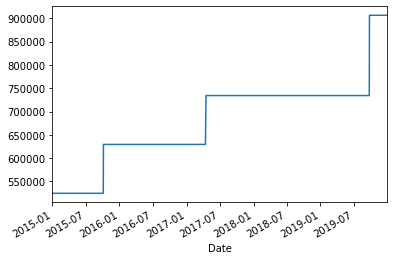

In [52]:
df_nosh['JAY MART'].plot()

In [53]:
# df_vo['JAY MART'].plot()

def get_measure(df, col_name):
    for c in df.columns:
        rows = df[c] # c = company name
        rows.index # time index
        rows.values # value (measure)
        measure = pd.DataFrame(data={'stock':c, 'date': rows.index.values, col_name: rows.values})
        yield measure

g = get_measure(df_nosh, 'NOSH')  # Use generator pattern!
next(g)

,stock,date,NOSH
0,EASTERN POLYMER GROUP,2015-01-01,2.8e+06
1,EASTERN POLYMER GROUP,2015-01-02,2.8e+06
2,EASTERN POLYMER GROUP,2015-01-05,2.8e+06
3,EASTERN POLYMER GROUP,2015-01-06,2.8e+06
4,EASTERN POLYMER GROUP,2015-01-07,2.8e+06
...,...,...,...
1300,EASTERN POLYMER GROUP,2019-12-25,2.8e+06
1301,EASTERN POLYMER GROUP,2019-12-26,2.8e+06
1302,EASTERN POLYMER GROUP,2019-12-27,2.8e+06
1303,EASTERN POLYMER GROUP,2019-12-30,2.8e+06


In [54]:
next(g)

,stock,date,NOSH
0,AE.THANA SINSAP (THAI.),2015-01-01,250000.0
1,AE.THANA SINSAP (THAI.),2015-01-02,250000.0
2,AE.THANA SINSAP (THAI.),2015-01-05,250000.0
3,AE.THANA SINSAP (THAI.),2015-01-06,250000.0
4,AE.THANA SINSAP (THAI.),2015-01-07,250000.0
...,...,...,...
1300,AE.THANA SINSAP (THAI.),2019-12-25,250000.0
1301,AE.THANA SINSAP (THAI.),2019-12-26,250000.0
1302,AE.THANA SINSAP (THAI.),2019-12-27,250000.0
1303,AE.THANA SINSAP (THAI.),2019-12-30,250000.0


In [55]:
next(g)

,stock,date,NOSH
0,CK POWER,2015-01-01,1100000.0
1,CK POWER,2015-01-02,1100000.0
2,CK POWER,2015-01-05,1100000.0
3,CK POWER,2015-01-06,1100000.0
4,CK POWER,2015-01-07,1100000.0
...,...,...,...
1300,CK POWER,2019-12-25,8129382.0
1301,CK POWER,2019-12-26,8129382.0
1302,CK POWER,2019-12-27,8129382.0
1303,CK POWER,2019-12-30,8129382.0


In [56]:

g = get_measure(df_dy, 'DY')  # Use generator pattern!
s1 = next(g)
s2 = next(g)

# try append two frame.  s1.append(s2)
    

In [57]:
# Chain NOSH

g = get_measure(df_nosh, 'NOSH')  # Use generator pattern!
s_nosh = next(g)
for s in g:
    s_nosh = s_nosh.append(s)

In [58]:
!pwd

/home/jovyan/dataset/Datastream/LBNGKSET


In [59]:
csv_name = '../LBNGK100/NOSH.csv.gz'
s_nosh.to_csv(csv_name)
s_nosh

,stock,date,NOSH
0,EASTERN POLYMER GROUP,2015-01-01,2.8e+06
1,EASTERN POLYMER GROUP,2015-01-02,2.8e+06
2,EASTERN POLYMER GROUP,2015-01-05,2.8e+06
3,EASTERN POLYMER GROUP,2015-01-06,2.8e+06
4,EASTERN POLYMER GROUP,2015-01-07,2.8e+06
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [60]:
# Chain DY

g = get_measure(df_dy, 'DY')  # Use generator pattern!
s_dy = next(g)
for s in g:
    s_dy = s_dy.append(s)

csv_name = '../LBNGK100/DY.csv.gz'
s_dy.to_csv(csv_name)
s_dy

,stock,date,DY
0,EASTERN POLYMER GROUP,2015-01-01,0
1,EASTERN POLYMER GROUP,2015-01-02,0
2,EASTERN POLYMER GROUP,2015-01-05,0
3,EASTERN POLYMER GROUP,2015-01-06,0
4,EASTERN POLYMER GROUP,2015-01-07,0
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [61]:
# Chain EPS

g = get_measure(df_eps, 'EPS')  # Use generator pattern!
s_eps = next(g)
for s in g:
    s_eps = s_eps.append(s)


csv_name = '../LBNGK100/EPS.csv.gz'
s_eps.to_csv(csv_name)
s_eps

,stock,date,EPS
0,EASTERN POLYMER GROUP,2015-01-01,0.39
1,EASTERN POLYMER GROUP,2015-01-02,0.39
2,EASTERN POLYMER GROUP,2015-01-05,0.39
3,EASTERN POLYMER GROUP,2015-01-06,0.39
4,EASTERN POLYMER GROUP,2015-01-07,0.39
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [62]:
s_dy

,stock,date,DY
0,EASTERN POLYMER GROUP,2015-01-01,0
1,EASTERN POLYMER GROUP,2015-01-02,0
2,EASTERN POLYMER GROUP,2015-01-05,0
3,EASTERN POLYMER GROUP,2015-01-06,0
4,EASTERN POLYMER GROUP,2015-01-07,0
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [63]:
# s_nosh['DY'] = s_dy['DY']
s_nosh

,stock,date,NOSH
0,EASTERN POLYMER GROUP,2015-01-01,2.8e+06
1,EASTERN POLYMER GROUP,2015-01-02,2.8e+06
2,EASTERN POLYMER GROUP,2015-01-05,2.8e+06
3,EASTERN POLYMER GROUP,2015-01-06,2.8e+06
4,EASTERN POLYMER GROUP,2015-01-07,2.8e+06
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [64]:
s_nosh.T

,0,1,2,3,4,5,6,7,8,9,...,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304
stock,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,...,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE
date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
NOSH,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,2.8e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
s_dy.T

,0,1,2,3,4,5,6,7,8,9,...,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304
stock,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,...,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE
date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
DY,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
s_eps.T

,0,1,2,3,4,5,6,7,8,9,...,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304
stock,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,EASTERN POLYMER GROUP,...,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE,PRIMA MARINE
date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
EPS,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
attributes = ['NOSH', 'DY', 'EPS', 'MV', 'VA', 'VO', 'P', 'PH', 'PL', 'PO', 'MTBV', 'PTBV' 'PI', 'RI', 'DWTA', 'MACD']

def reduce_fetch_frame(df, col):
    g = get_measure(df, col)  # Use generator pattern!
    s_df = next(g)
    for s in g:
        s_df = s_df.append(s)
    return s_df # the data frame that appends each chunk

# Chain P, PO, PH, PL

s_nosh = reduce_fetch_frame(df_nosh, 'NOSH')
s_dy = reduce_fetch_frame(df_dy, 'DY')
s_eps = reduce_fetch_frame(df_eps, 'EPS')
s_mv = reduce_fetch_frame(df_mv, 'MV')
s_va = reduce_fetch_frame(df_va, 'VA')
s_vo = reduce_fetch_frame(df_vo, 'VO')
s_p = reduce_fetch_frame(df_p, 'P')
s_ph = reduce_fetch_frame(df_ph, 'PH')
s_pl = reduce_fetch_frame(df_pl, 'PL')
s_po = reduce_fetch_frame(df_po, 'PO')

# s_mtbv = reduce_fetch_frame(df_mtbv, 'MTBV')
s_ptbv = reduce_fetch_frame(df_ptbv, 'PTBV')
s_pi = reduce_fetch_frame(df_pi, 'PI')
s_ri = reduce_fetch_frame(df_ri, 'RI')
s_dwta = reduce_fetch_frame(df_dwta, 'DWTA')
# s_macd

s_p


,stock,date,P
0,EASTERN POLYMER GROUP,2015-01-01,6.8
1,EASTERN POLYMER GROUP,2015-01-02,6.8
2,EASTERN POLYMER GROUP,2015-01-05,7.2
3,EASTERN POLYMER GROUP,2015-01-06,7.05
4,EASTERN POLYMER GROUP,2015-01-07,7.15
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


In [94]:

s_pi


,stock,date,PI
0,EASTERN POLYMER GROUP,2015-01-01,102.3
1,EASTERN POLYMER GROUP,2015-01-02,102.3
2,EASTERN POLYMER GROUP,2015-01-05,108.3
3,EASTERN POLYMER GROUP,2015-01-06,106
4,EASTERN POLYMER GROUP,2015-01-07,107.5
...,...,...,...
1300,PRIMA MARINE,2019-12-25,NaN
1301,PRIMA MARINE,2019-12-26,NaN
1302,PRIMA MARINE,2019-12-27,NaN
1303,PRIMA MARINE,2019-12-30,NaN


# Combine attributes. Use multiindex to be able to join data frames.

In [95]:
# Combine seven attribute columns.  :

# Create multiindex. See advance manual https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
arrays = [s_vo['stock'].values, s_vo['date'].values]
tuples = list(zip(*arrays))
# tuples
index = pd.MultiIndex.from_tuples(tuples, names=["stock", "date"])
s_vo.index = index


s_vo

stock       date       VO
stock                 date                                                 
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP 2015-01-01       NA
                      2015-01-02  EASTERN POLYMER GROUP 2015-01-02       NA
                      2015-01-05  EASTERN POLYMER GROUP 2015-01-05   101026
                      2015-01-06  EASTERN POLYMER GROUP 2015-01-06  50945.9
                      2015-01-07  EASTERN POLYMER GROUP 2015-01-07  88996.3
...                                                 ...        ...      ...
PRIMA MARINE          2019-12-25           PRIMA MARINE 2019-12-25      NaN
                      2019-12-26           PRIMA MARINE 2019-12-26      NaN
                      2019-12-27           PRIMA MARINE 2019-12-27      NaN
                      2019-12-30           PRIMA MARINE 2019-12-30      NaN
                      2019-12-31           PRIMA MARINE 2019-12-31      NaN

[190530 rows x 3 columns]

In [96]:

def make_index(df):
    # Create multiindex. See advance manual https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
    arrays = [df['stock'].values, df['date'].values]
    tuples = list(zip(*arrays))
    # tuples
    index = pd.MultiIndex.from_tuples(tuples, names=["stock", "date"])
    df.index = index
    return df

s_va = make_index(s_va)
s_va

stock       date      VA
stock                 date                                                
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP 2015-01-01      NA
                      2015-01-02  EASTERN POLYMER GROUP 2015-01-02      NA
                      2015-01-05  EASTERN POLYMER GROUP 2015-01-05  711166
                      2015-01-06  EASTERN POLYMER GROUP 2015-01-06  362906
                      2015-01-07  EASTERN POLYMER GROUP 2015-01-07  650348
...                                                 ...        ...     ...
PRIMA MARINE          2019-12-25           PRIMA MARINE 2019-12-25     NaN
                      2019-12-26           PRIMA MARINE 2019-12-26     NaN
                      2019-12-27           PRIMA MARINE 2019-12-27     NaN
                      2019-12-30           PRIMA MARINE 2019-12-30     NaN
                      2019-12-31           PRIMA MARINE 2019-12-31     NaN

[190530 rows x 3 columns]

In [97]:
s_p = make_index(s_p)
s_ph = make_index(s_ph)
s_pl = make_index(s_pl)
s_po = make_index(s_po)

s_nosh = make_index(s_nosh)
s_dy = make_index(s_dy)
s_eps = make_index(s_eps)
s_mv = make_index(s_mv)
s_ptbv = make_index(s_ptbv)
s_pi = make_index(s_pi)
s_ri = make_index(s_ri)
s_dwta = make_index(s_dwta)

In [107]:
df_attr = pd.concat([s_nosh, s_mv, s_vo, s_va, s_p, s_ph, s_pl, s_po, s_pi, s_ri], axis=1).reindex(s_nosh.index)
#                      , s_dy, s_eps , s_ptbv, s_dwta
df_attr

stock       date     NOSH  \
stock                 date                                                    
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP 2015-01-01  2.8e+06   
                      2015-01-02  EASTERN POLYMER GROUP 2015-01-02  2.8e+06   
                      2015-01-05  EASTERN POLYMER GROUP 2015-01-05  2.8e+06   
                      2015-01-06  EASTERN POLYMER GROUP 2015-01-06  2.8e+06   
                      2015-01-07  EASTERN POLYMER GROUP 2015-01-07  2.8e+06   
...                                                 ...        ...      ...   
PRIMA MARINE          2019-12-25           PRIMA MARINE 2019-12-25      NaN   
                      2019-12-26           PRIMA MARINE 2019-12-26      NaN   
                      2019-12-27           PRIMA MARINE 2019-12-27      NaN   
                      2019-12-30           PRIMA MARINE 2019-12-30      NaN   
                      2019-12-31           PRIMA MARINE 2019-12-31      NaN   

                                                  stock       date     MV  \
stock                 date                                                  
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP 2015-01-01  19040   
                      2015-01-02  EASTERN POLYMER GROUP 2015-01-02  19040   
                      2015-01-05  EASTERN POLYMER GROUP 2015-01-05  20160   
                      2015-01-06  EASTERN POLYMER GROUP 2015-01-06  19740   
                      2015-01-07  EASTERN POLYMER GROUP 2015-01-07  20020   
...                                                 ...        ...    ...   
PRIMA MARINE          2019-12-25           PRIMA MARINE 2019-12-25    NaN   
                      2019-12-26           PRIMA MARINE 2019-12-26    NaN   
                      2019-12-27           PRIMA MARINE 2019-12-27    NaN   
                      2019-12-30           PRIMA MARINE 2019-12-30    NaN   
                      2019-12-31           PRIMA MARINE 2019-12-31    NaN   

                                                  stock       date       VO  \
stock                 date                                                    
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP 2015-01-01       NA   
                      2015-01-02  EASTERN POLYMER GROUP 2015-01-02       NA   
                      2015-01-05  EASTERN POLYMER GROUP 2015-01-05   101026   
                      2015-01-06  EASTERN POLYMER GROUP 2015-01-06  50945.9   
                      2015-01-07  EASTERN POLYMER GROUP 2015-01-07  88996.3   
...                                                 ...        ...      ...   
PRIMA MARINE          2019-12-25           PRIMA MARINE 2019-12-25      NaN   
                      2019-12-26           PRIMA MARINE 2019-12-26      NaN   
                      2019-12-27           PRIMA MARINE 2019-12-27      NaN   
                      2019-12-30           PRIMA MARINE 2019-12-30      NaN   
                      2019-12-31           PRIMA MARINE 2019-12-31      NaN   

                                                  stock  ...    PL  \
stock                 date                               ...         
EASTERN POLYMER GROUP 2015-01-01  EASTERN POLYMER GROUP  ...    NA   
                      2015-01-02  EASTERN POLYMER GROUP  ...    NA   
                      2015-01-05  EASTERN POLYMER GROUP  ...   6.7   
                      2015-01-06  EASTERN POLYMER GROUP  ...  7.05   
                      2015-01-07  EASTERN POLYMER GROUP  ...   7.1   
...                                                 ...  ...   ...   
PRIMA MARINE          2019-12-25           PRIMA MARINE  ...   NaN   
                      2019-12-26           PRIMA MARINE  ...   NaN   
                      2019-12-27           PRIMA MARINE  ...   NaN   
                      2019-12-30           PRIMA MARINE  ...   NaN   
                      2019-12-31           PRIMA MARINE  ...   NaN   

                                                  stock       date    PO  \
stock

In [110]:

# df_attr[['NOSH', 'MV', 'VO','VA','P','PH','PL','PO', 'DY', 'EPS', 'PTBV', 'PI', 'RI', 'DWTA']]

measures = ['NOSH', 'MV', 'VO','VA','P','PH','PL','PO', 'PI', 'RI']
df_attr[measures]

NOSH     MV       VO      VA     P    PH  \
stock                 date                                                      
EASTERN POLYMER GROUP 2015-01-01  2.8e+06  19040       NA      NA   6.8   6.8   
                      2015-01-02  2.8e+06  19040       NA      NA   6.8   6.8   
                      2015-01-05  2.8e+06  20160   101026  711166   7.2   7.2   
                      2015-01-06  2.8e+06  19740  50945.9  362906  7.05  7.05   
                      2015-01-07  2.8e+06  20020  88996.3  650348  7.15  7.15   
...                                   ...    ...      ...     ...   ...   ...   
PRIMA MARINE          2019-12-25      NaN    NaN      NaN     NaN   NaN   NaN   
                      2019-12-26      NaN    NaN      NaN     NaN   NaN   NaN   
                      2019-12-27      NaN    NaN      NaN     NaN   NaN   NaN   
                      2019-12-30      NaN    NaN      NaN     NaN   NaN   NaN   
                      2019-12-31      NaN    NaN      NaN     NaN   NaN   NaN   

                                    PL    PO     PI      RI  
stock                 date                                   
EASTERN POLYMER GROUP 2015-01-01    NA    NA  102.3  102.26  
                      2015-01-02    NA    NA  102.3  102.26  
                      2015-01-05   6.7   6.8  108.3  108.27  
                      2015-01-06  7.05   7.1    106  106.02  
                      2015-01-07   7.1  7.15  107.5  107.52  
...                                ...   ...    ...     ...  
PRIMA MARINE          2019-12-25   NaN   NaN    NaN     NaN  
                      2019-12-26   NaN   NaN    NaN     NaN  
                      2019-12-27   NaN   NaN    NaN     NaN  
                      2019-12-30   NaN   NaN    NaN     NaN  
                      2019-12-31   NaN   NaN    NaN     NaN  

[190530 rows x 10 columns]

In [111]:
csv_name = '../set100_daily_facts.csv.gz'
df_attr[measures].to_csv(csv_name)

In [112]:
table_name = 'set100_daily_facts'
df_attr[measures].to_sql(table_name, con=cnx, if_exists='replace')


# Use SQL to select from Database

In [115]:
sql = """SELECT COUNT(*) FROM set100_daily_facts;"""
df_read = pd.read_sql(sql, cnx)
df_read

,COUNT(*)
0,190530


In [116]:
sql = """SELECT COUNT(*) FROM set100_companies;"""
df_read = pd.read_sql(sql, cnx)
df_read

,COUNT(*)
0,149


In [121]:
# NOSH observations

sql = """SELECT c.symbol, COUNT(f.NOSH) AS obs
FROM set100_companies c 
JOIN set100_daily_facts f ON c.name_x = f.stock
GROUP BY f.stock;"""
df_read = pd.read_sql(sql, cnx)
df_read

,symbol,obs
0,ADVANC,1305
1,AEONTS,1305
2,AOT,1305
3,AMATA,1305
4,ANAN,1305
...,...,...
141,VGI,1305
142,VIBHA,1305
143,WHA,1305
144,WHAUP,522


In [122]:
# MV observations

sql = """SELECT c.symbol, COUNT(f.MV) AS obs
FROM set100_companies c 
JOIN set100_daily_facts f ON c.name_x = f.stock
GROUP BY f.stock;"""
df_read = pd.read_sql(sql, cnx)
df_read

,symbol,obs
0,ADVANC,1305
1,AEONTS,1305
2,AOT,1305
3,AMATA,1305
4,ANAN,1305
...,...,...
141,VGI,1305
142,VIBHA,1305
143,WHA,1305
144,WHAUP,522


In [133]:
# VO observations

sql = """SELECT c.symbol, COUNT(f.VO) AS obs
FROM set100_companies c 
JOIN set100_daily_facts f ON c.name_x = f.stock
GROUP BY f.stock;"""
df_read = pd.read_sql(sql, cnx)
df_read

,symbol,obs
0,ADVANC,1305
1,AEONTS,1305
2,AOT,1305
3,AMATA,1305
4,ANAN,1305
...,...,...
141,VGI,1305
142,VIBHA,1305
143,WHA,1305
144,WHAUP,522


In [134]:
# VO observations

sql = """SELECT f.date, COUNT(f.VO) AS obs, f.VO
FROM set100_companies c 
JOIN set100_daily_facts f ON c.name_x = f.stock
GROUP BY f.date
;"""
df_read = pd.read_sql(sql, cnx)
df_read

,date,obs,VO
0,2015-01-01 00:00:00,145,NA
1,2015-01-02 00:00:00,145,NA
2,2015-01-05 00:00:00,145,16567.4
3,2015-01-06 00:00:00,145,59230.2
4,2015-01-07 00:00:00,145,24048.5
...,...,...,...
1299,2019-12-25 00:00:00,124,1739.2
1300,2019-12-26 00:00:00,124,2558.2
1301,2019-12-27 00:00:00,124,4667.2
1302,2019-12-30 00:00:00,124,6361.1


In [140]:
# By Stock

sql = """SELECT c.symbol, f.*
FROM set100_daily_facts f  
JOIN set100_companies c ON c.name_x = f.stock
WHERE c.symbol = 'KBANK'
;"""
df_read = pd.read_sql(sql, cnx)
df_read

,symbol,stock,date,NOSH,MV,VO,VA,P,PH,PL,PO,PI,RI
0,KBANK,KASIKORNBANK,2015-01-01 00:00:00,2393260.0,548056.7,NA,NA,229.0,229.0,NA,NA,1840.2,3948.53
1,KBANK,KASIKORNBANK,2015-01-02 00:00:00,2393260.0,548056.7,NA,NA,229.0,229.0,NA,NA,1840.2,3948.53
2,KBANK,KASIKORNBANK,2015-01-05 00:00:00,2393260.0,526517.3,8258.3,1849770.0,220.0,220.0,220.0,226.0,1767.8,3793.35
3,KBANK,KASIKORNBANK,2015-01-06 00:00:00,2393260.0,512157.8,14104.4,3004321.0,214.0,214.0,205.0,214.0,1719.6,3689.90
4,KBANK,KASIKORNBANK,2015-01-07 00:00:00,2393260.0,521730.8,8670.4,1880417.0,218.0,218.0,214.0,215.0,1751.8,3758.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,KBANK,KASIKORNBANK,2019-12-25 00:00:00,2393260.0,361382.4,4196.7,626523.3,151.0,151.0,147.0,147.5,1213.4,2886.44
1301,KBANK,KASIKORNBANK,2019-12-26 00:00:00,2393260.0,358989.1,4142.3,621749.7,150.0,150.0,149.5,151.0,1205.3,2867.32
1302,KBANK,KASIKORNBANK,2019-12-27 00:00:00,2393260.0,358989.1,5253.1,789417.8,150.0,150.0,149.0,151.0,1205.3,2867.32
1303,KBANK,KASIKORNBANK,2019-12-30 00:00:00,2393260.0,361382.4,4281.8,646659.9,151.0,151.0,150.0,150.0,1213.4,2886.44


In [146]:
# By Date

sql = """SELECT c.symbol, f.*
FROM set100_daily_facts f  
JOIN set100_companies c ON c.name_x = f.stock
WHERE f.date BETWEEN '2018-08-16' AND '2018-08-17'
;"""
df_read = pd.read_sql(sql, cnx)
df_read

,symbol,stock,date,NOSH,MV,VO,VA,P,PH,PL,PO,PI,RI
0,AAV,ASIA AVIATION,2018-08-16 00:00:00,4849999.0,20369.99,13467.3,56531.0,4.20,4.20,4.18,4.2,113.5,125.85
1,ADVANC,ADVANCED INFO SER.,2018-08-16 00:00:00,2973094.0,578266.80,4923.8,955457.2,194.50,194.50,193.0,193.0,4572.2,15471.00
2,AEONTS,AE.THANA SINSAP (THAI.),2018-08-16 00:00:00,250000.0,40875.00,458.2,74362.3,163.50,163.50,160.0,162.0,1287.4,2524.45
3,AMATA,AMATA,2018-08-16 00:00:00,1109680.0,21083.92,19761.4,367997.6,18.85,18.85,18.35,18.45,1548.5,3263.84
4,ANAN,ANANDA DEVELOPMENT,2018-08-16 00:00:00,3332994.0,17164.92,13409.2,68038.5,5.15,5.15,5.0,5.05,135.5,154.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,VIBHA,VIBHAVADI MEDICAL,2018-08-16 00:00:00,13196930.0,31144.75,6662.8,15744.7,2.36,2.36,2.34,2.36,855.4,1633.48
142,VNG,VANACHAI GROUP,2018-08-16 00:00:00,1567006.0,12222.65,41.3,323.9,7.80,7.80,7.8,7.85,147.4,318.32
143,WHA,WHA,2018-08-16 00:00:00,14334270.0,53036.77,100899.7,371797.5,3.70,3.70,3.6,3.62,394.8,440.51
144,WHAUP,WHA UTILITIES AND POWER,2018-08-16 00:00:00,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN
